In [1]:
import numpy as np
from polymer.config import Config
import toml
import matplotlib.pyplot as plt

In [3]:
print(type(None))
print(type(5.3))

<class 'NoneType'>
<class 'float'>


In [4]:
path = "/home/jan/Documents/masterthesis/project/mucus/config.toml"
config = Config.from_toml(path)
data = toml.load(open(path, encoding="UTF-8"))
print(data)
config = Config.from_dict(data)
print(config)

{'steps': 1000, 'stride': 50, 'nbeads': 10, 'nchains': 6, 'mobility': 5e-05, 'fname_sys': '/home/jan/Desktop', 'fname_traj': '/home/jan/Desktop'}
steps=1000 stride=50 nbeads=10 nchains=6 mobility=5e-05 rbead=1.0 qbead=2.08 force_constant=100.0 epsilon_LJ=0.25 sigma_LJ=2.0 cutoff_LJ=2.0 lB_debye=3.077 c_S=10 cutoff_debye=4.0 lbox=None pbc=True cutoff_pbc=None save_traj=True write_traj=True cwd='/home/jan/Documents/masterthesis/project/mucus' fname_traj='/home/jan/Desktop' fname_sys='/home/jan/Desktop' bonds=None simulation_time=None


In [3]:
cfg_path = "/home/jan/Documents/masterthesis/project/mucus/configs/tests"

for i in range(6):
    fin = cfg_path + f"/cfg_test_time_nbeads_{i:d}.toml"
    x = open(fin, encoding="UTF-8")
    out = toml.load(x)
    print(x)

<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_0.toml' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_1.toml' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_2.toml' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_3.toml' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_4.toml' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/jan/Documents/masterthesis/project/mucus/configs/tests/cfg_test_time_nbeads_5.toml' mode='r' encoding='UTF-8'>


In [19]:
# CREATE CONFIG FILES FOR TESTING

#config_dict = {'steps': 100, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05, 'fname_sys': "'a/b/c.txt'", 'fname_traj': None}
config_dict = {'steps': 5000, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05}

nm = ((6, 6), (10, 8), (10, 16), (12, 36), (20, 36), (11, 91))

pathout = "/home/jan/Documents/masterthesis/project/mucus/configs/tests"

for i, k in enumerate(nm):
    config_dict["nbeads"] = k[0]
    config_dict["nchains"] = k[1]
    config_dict["fname_sys"] = f"'/home/janmak98/mucus/configs/cfg_test_time_nbeads_{i:d}.toml'"
    config_dict["fname_traj"] = f"'/storage/janmak98/masterthesis/trajectories/box/test/traj_test_time_nbeads_{i:d}.gro'"
    config_dict["cwd"] = "'/home/janmak98/mucus'"
    output = ""
    for key in config_dict:
        output += f"{key:s} = {config_dict[key]}\n"
    
    fout = pathout + f"/cfg_test_time_nbeads_{i:d}.toml"

    f = open(fout, "w")
    f.write(output)
    f.close()
    
    #cfg = Config.from_dict(config_dict)
    #print(cfg)
    #cfg.save_config(fout)
    


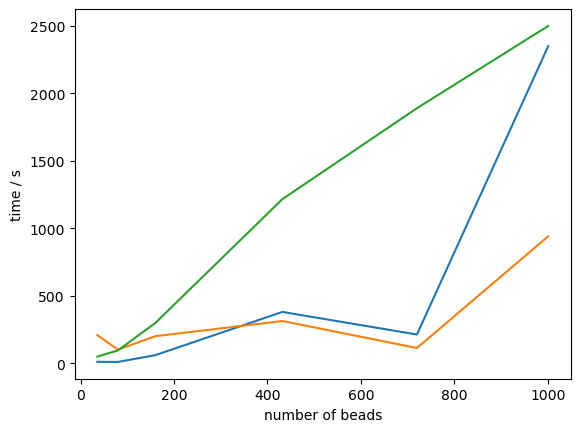


Number of beads
[36, 80, 160, 432, 720, 1001]

Simulation time in minutes
[ 0.17098269  0.1571634   0.99199353  6.32884361  3.5414225  39.14664487]

Particle density of the system in r0^-3
[0.020833333333333332, 0.01, 0.02, 0.03125, 0.01125, 0.09400826446280992]

Time to simulate system scaled up to 1000 particles and 1e7 steps in hours
[ 15.83173025   6.54847489  20.66653197  48.83366986  16.39547453
 130.35845779]


In [22]:
# plot simulation times
time = list(())
nbeads = list(())
rhobox = list(())
for i in range(6):
    path = f'/home/jan/Documents/masterthesis/project/mucus/configs/cfg_test_time_nbeads_{i:d}.toml'
    data = toml.load(open(path, encoding="UTF-8"))
    time.append(data["simulation_time"])
    nbeads.append(data["nbeads"]*data["nchains"])
    rhobox.append(data["nbeads"]*data["nchains"]/data["lbox"]**3)

plt.figure()
plt.plot(nbeads, time)
plt.plot(nbeads, np.array(rhobox)*10000)
plt.plot(nbeads, time/(np.array(rhobox)*10))
plt.xlabel("number of beads")
plt.ylabel("time / s")
plt.show()
print("\nNumber of beads")
print(nbeads)
print("\nSimulation time in minutes")
print(np.array(time)/60)
print("\nParticle density of the system in r0^-3")
print(rhobox)
print("\nTime to simulate system scaled up to 1000 particles and 1e7 steps in hours")
print(np.array(time)/60/60*1000/np.array(nbeads)*1e6/5000)

36
80
160
432
720
1001
10


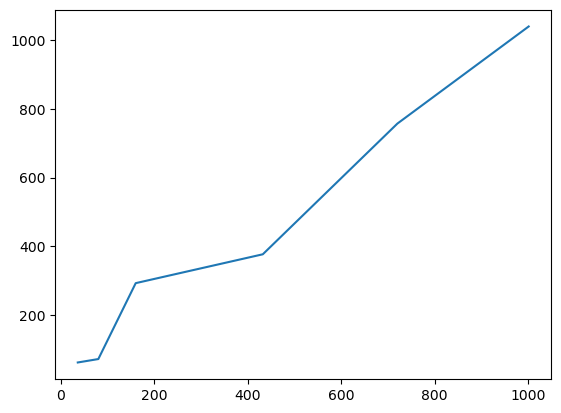

In [38]:
# create different config files, that are loaded into the class with a loop

config_dict = {'steps': 10000, 'stride': 50, 'nbeads': 10, 'nchains': 8, 'mobility': 5e-05}

nm = ((6, 6), (10, 8), (10, 16), (12, 36), (20, 36), (11, 91))

for k in nm:
    n = k[0]
    m = k[1]
    print(n*m)

print(config_dict['nbeads'])
xy = np.array(nm)
plt.plot(xy[:, 0]*xy[:, 1],xy[:, 0]*xy[:, 1]+100*np.random.randn(*np.shape(xy[:,1])))
